In [1]:
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
adata = sc.read('D:/UCI Research/CellxGene Tutorial/data/brain_embeddings.h5ad')

C:\Anaconda\envs\master\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\envs\master\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


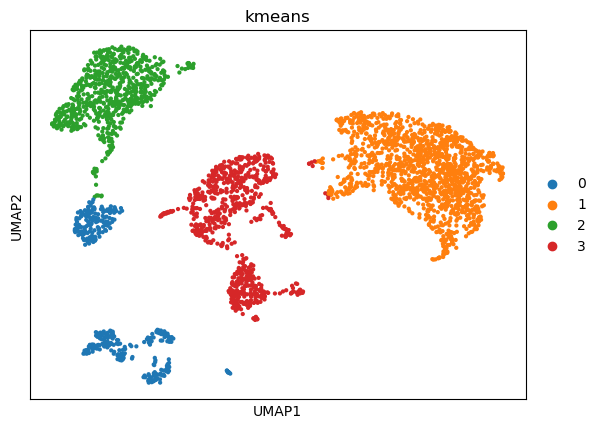

In [10]:
umap_coordinates = adata.obsm['X_umap'] # extract the UMAP coordinates for each cell
kmeans = KMeans(n_clusters=4, random_state=0).fit(umap_coordinates) # fix the random state for reproducibility

adata.obs['kmeans'] = kmeans.labels_ # retrieve the labels and add them as a metadata column in our AnnData object
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans') # plot the results

# Evaluating Clustering

In [11]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))
#A value of 1 means the two clusterings are identical, 
# and 0 means the level of similarity expected by random chance.

The Rand index is 0.84


C:\Anaconda\envs\master\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\envs\master\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


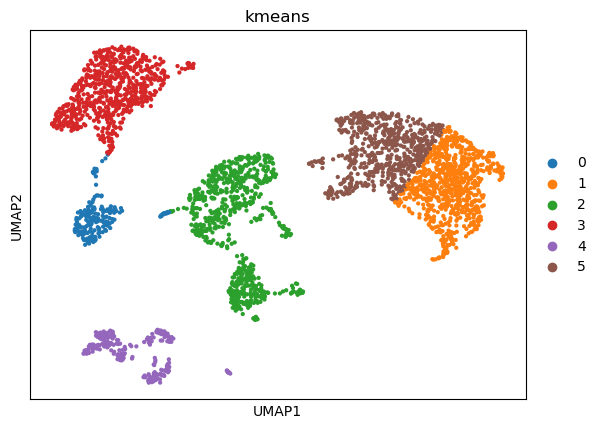

In [8]:
kmeans = KMeans(n_clusters=6 , random_state=0).fit(umap_coordinates) # fix the random state for reproducibility

adata.obs['kmeans'] = kmeans.labels_ # retrieve the labels and add them as a metadata column in our AnnData object
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans') # plot the results

In [9]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))
# so the Rand index decrease when k is increased

The Rand index is 0.6


C:\Anaconda\envs\master\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


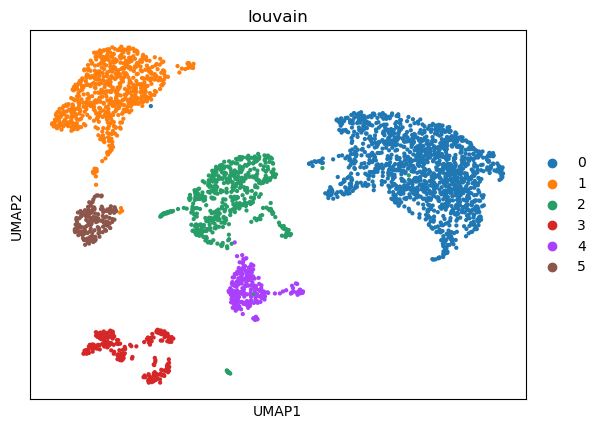

The rand index is  0.91


In [16]:
sc.tl.louvain(adata, resolution=0.1) # add resolution = 0.1 here to increase rand
sc.pl.umap(adata, color='louvain')
rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['louvain'])
print('The rand index is ', round(rand_index, 2))

In [13]:
help(sc.tl.louvain)

Help on function louvain in module scanpy.tools._louvain:

louvain(adata: anndata._core.anndata.AnnData, resolution: Optional[float] = None, random_state: Union[NoneType, int, numpy.random.mtrand.RandomState] = 0, restrict_to: Optional[Tuple[str, Sequence[str]]] = None, key_added: str = 'louvain', adjacency: Optional[scipy.sparse._matrix.spmatrix] = None, flavor: Literal['vtraag', 'igraph', 'rapids'] = 'vtraag', directed: bool = True, use_weights: bool = False, partition_type: Optional[Type[louvain.VertexPartition.MutableVertexPartition]] = None, partition_kwargs: Mapping[str, Any] = mappingproxy({}), neighbors_key: Optional[str] = None, obsp: Optional[str] = None, copy: bool = False) -> Optional[anndata._core.anndata.AnnData]
    Cluster cells into subgroups [Blondel08]_ [Levine15]_ [Traag17]_.
    
    Cluster cells using the Louvain algorithm [Blondel08]_ in the implementation
    of [Traag17]_. The Louvain algorithm has been proposed for single-cell
    analysis by [Levine15]_.
   

In [17]:
cerebellum = adata[adata.obs['subtissue'] == 'Cerebellum'] # choose a different body part/cell types
sc.pp.neighbors(cerebellum)
sc.tl.umap(cerebellum)

C:\Anaconda\envs\master\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Anaconda\envs\master\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Anaconda\envs\master\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword 

C:\Anaconda\envs\master\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


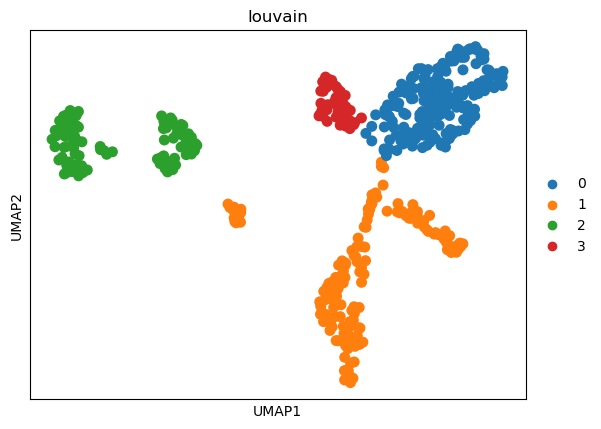

The rand index is  0.82


In [18]:
sc.tl.louvain(cerebellum, resolution=0.1) # add resolution = 0.1 here to increase rand
sc.pl.umap(cerebellum, color='louvain')
rand_index = adjusted_rand_score(cerebellum.obs['cell_ontology_class'], cerebellum.obs['louvain'])
print('The rand index is ', round(rand_index, 2))

In [20]:
sc.tl.louvain(adata, resolution=0.1)
adata.write('D:/UCI Research/CellxGene Tutorial/data/brain_clusters.h5ad')